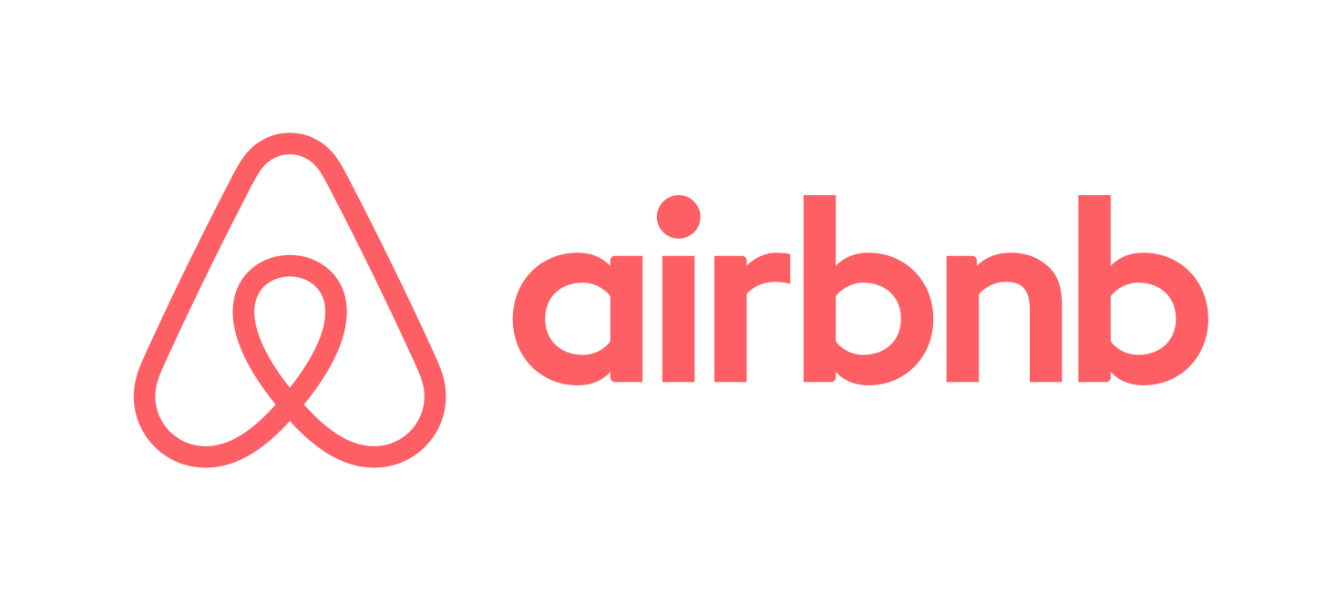

## MSCA 37014- Python for Analytics 

### Airbnb Price Prediction Project

Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

Airbnb is interested in better understanding data relating to price of listings on their website. They want to gain insight into its usefulness in the listing assessment process. The dataset consists of a random sample of homes.

A data dictionary is saved as an excel file here: 

For this project I am using the CRISP-DM methodology. 

1. Business Understanding
2. Data Understanding
3. Data Preparation 
4. Modeling
5. Evaluation 
6. Deployment 

# 1. Data Understanding 



In [1]:
# import packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

np.set_printoptions(precision=2)
pd.set_option('display.max_columns', None)
%matplotlib inline
plt.rc('figure', figsize=(10,5))
figsize_with_subplots = (10,10)
bin_size=10
plt.rcParams.update({'figure.max_open_warning': 0})
%pprint = False

Pretty printing has been turned OFF


In [2]:
df = pd.read_csv('data/listings.csv.gz')

## Exploratory Data Analysis

Three main components of exploring data:
1. Understanding variables 
2. Cleaning your dataset
3. Analyzing relationships between variables

### Understanding variables

In [3]:
df.shape

(16116, 74)

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210907032724,2021-09-07,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36435,4.94358,Private room in rental unit,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Single level home"", ""Coffee maker"", ""Long te...",$59.00,3,28,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,3,28,55,124,2021-09-07,280,2,0,2013-08-25,2019-11-21,4.89,4.93,5.00,4.97,4.97,4.68,4.81,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.86
1,20168,https://www.airbnb.com/rooms/20168,20210907032724,2021-09-07,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",+ (Phone number hidden by Airbnb),within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36407,4.89393,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Hot water"", ""TV"", ""Hangers"", ""Essentials"", ""...",$106.00,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,0,0,2021-09-07,339,0,0,2014-01-17,2020-03-27,4.44,4.69,4.79,4.63,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,3.64
2,25428,https://www.airbnb.com/rooms/25428,20210907032724,2021-09-07,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",NaN,NaN,0%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37490,4.88487,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Cable TV

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16116 entries, 0 to 16115
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16116 non-null  int64  
 1   listing_url                                   16116 non-null  object 
 2   scrape_id                                     16116 non-null  int64  
 3   last_scraped                                  16116 non-null  object 
 4   name                                          16086 non-null  object 
 5   description                                   15893 non-null  object 
 6   neighborhood_overview                         10405 non-null  object 
 7   picture_url                                   16116 non-null  object 
 8   host_id                                       16116 non-null  int64  
 9   host_url                                      16116 non-null 

In [6]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.611600e+04,1.611600e+04,1.611600e+04,16111.000000,16111.000000,0.0,16116.000000,16116.000000,16116.000000,0.0,15218.000000,16019.000000,16116.000000,16116.000000,16113.000000,16113.000000,16113.000000,1.611300e+04,16113.000000,1.611300e+04,0.0,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,14029.000000,13815.000000,13816.000000,13807.000000,13812.000000,13807.000000,13807.000000,16116.000000,16116.000000,16116.000000,16116.000000,14029.000000
mean,2.118184e+07,2.021091e+13,6.976052e+07,2.023338,2.023338,NaN,52.365510,4.889434,2.836684,NaN,1.530096,1.758100,3.991189,608.146811,3.953578,4.149134,685.520449,2.672465e+05,4.025489,2.666400e+05,NaN,4.026309,8.839787,14.321730,55.316890,24.645383,1.386262,0.325453,4.691878,4.811200,4.701267,4.847800,4.868875,4.728831,4.600638,1.636883,1.096674,0.489514,0.008067,0.677467
std,1.352063e+07,1.683646e+00,9.027164e+07,23.344729,23.344729,NaN,0.016563,0.036151,1.312016,NaN,0.951085,1.467627,20.987452,540.665822,20.988709,21.034236,532.480917,2.392451e+07,20.996160,2.387038e+07,NaN,8.702405,18.140200,28.508009,107.907731,56.707709,7.477153,2.025282,0.668502,0.345724,0.440648,0.307706,0.299283,0.328007,0.390520,2.402076,1.870279,1.531128,0.134829,1.720379
min,2.818000e+03,2.021091e+13,3.159000e+03,0.000000,0.000000,NaN,52.290340,4.755710,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.018020e+07,2.021091e+13,9.735558e+06,1.000000,1.000000,NaN,52.355130,4.863690,2.000000,NaN,1.000000,1.000000,2.000000,21.000000,2.000000,2.000000,28.000000,2.800000e+01,2.000000,2.800000e+01,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,4.670000,4.750000,4.600000,4.820000,4.850000,4.600000,4.500000,1.000000,1.000000,0.000000,0.000000,0.110000
50%,1.926593e+07,2.021091e+13,2.974134e+07,1.000000,1.000000,NaN,52.364880,4.886900,2.000000,NaN,1.000000,1.000000,2.000000,1125.000000,2.000000,3.000000,1125.000000,1.125000e+03,2.000000,1.125000e+03,NaN,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,4.860000,4.910000,4.830000,4.950000,4.980000,4.810000,4.670000,1.000000,1.000000,0.000000,0.000000,0.270000
75%,3.107548e+07,2.021091e+13,8.988321e+07,1.000000,1.000000,NaN,52.375440,4.909160,4.000000,NaN,2.000000,2.000000,3.000000,1125.000000,3.000000,3.000000,1125.000000,1.125000e+03,3.000000,1.125000e+03,NaN,0.000000,2.000000,5.000000,47.000000,22.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.830000,1.000000,1.000000,0.000000,0.000000,0.620000
max,5.208280e+07,2.021091e+13,4.210037e+08,1992.000000,1992.000000,NaN,52.425340,5.066508,16.000000,NaN,50.000000,33.000000,1100.000000,1825.000000,1100.000000,1100.000000,1825.000000,2.147484e+09,1100.000000,2.142625e+09,NaN,30.000000,60.000000,90.000000,365.000000,877.000000,422.000000,137.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,30.000000,21.000000,4.000000,107.840000


Some quick observations:

- host_listings count is highly sqewed. Probably an outlier in there. The max is 1992 when 75% of the data is 1. 
- Same with host_total_listings_count 
- neihbourhood_group_cleansed has no values 
- accomodates also seems to have a few really large values.
- bathrooms has no values
- bedroom seems to have an outlier. the max bedroom is 50. Same with beds (33), min_nights (1100), max_nights (1825), min_min_nights (1100), max_min_nights (1100), min_max_nights (1825), min_nights_avg_ntm (1100) 
- Not sure what the column max_max_nights represents. Shows really large values. 
- calendar_updated has no values 
- availability also seems to be highly skewed
- no of reviews alos seems to be highly skewed

In [7]:
# Converting price to float
from re import sub
from decimal import Decimal

def convert_price_to_float(money):
    value = float(Decimal(sub(r'[^\d.]', '', money)))
    return value

df['price_ft'] = df['price'].str[1:].apply(lambda x: convert_price_to_float(x))
# converting those columns to float 
df['host_acceptance_rate'] = df['host_acceptance_rate'].str[:-1].apply(lambda x: float(x))
df['host_response_rate'] = df['host_response_rate'].str[:-1].apply(lambda x: float(x))

In [8]:
# separating the catgorical and numerical variables 
# Not including url columns in categorical and id cols in numerical
cat_cols = []
num_cols = []
extra = ['id', 'listing_url', 'scrape_id', 'last_scraped','name', 'description','neighborhood_overview','picture_url', 'host_id',
        'host_url','host_name','host_about', 'host_thumbnail_url','host_picture_url','license','neighbourhood_group_cleansed',
        'bathrooms','calendar_updated']

for i in df.columns:
    if (df[i].dtype == 'object') & (i not in extra):
        cat_cols.append(i)
    elif (df[i].dtype != 'object') & (i not in extra):
        num_cols.append(i)
    else:
        continue

In [9]:
cat_cols

['host_since', 'host_location', 'host_response_time', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'instant_bookable']

In [10]:
num_cols

['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'price_ft']

In [11]:
extra

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'license', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated']

In [12]:
# Looking at what unique values each categorical colum has 

for col in df.columns.values:
    if col in cat_cols:
        print(df[col].value_counts(normalize=True).round(decimals=4))
        print('\n')

2014-04-29    0.0026
2014-04-22    0.0019
2015-07-21    0.0019
2014-07-29    0.0016
2014-07-21    0.0015
               ...  
2018-08-19    0.0001
2011-06-16    0.0001
2012-04-17    0.0001
2010-08-04    0.0001
2021-06-03    0.0001
Name: host_since, Length: 3235, dtype: float64


Amsterdam, North Holland, Netherlands         0.5609
Amsterdam, North Holland, The Netherlands     0.1773
NL                                            0.0836
Amsterdam, Noord-Holland, The Netherlands     0.0566
Netherlands                                   0.0253
                                               ...  
Malmö, Sweden                                 0.0001
Loosdrecht, North Holland, Netherlands        0.0001
Ciudad de México, Ciudad de México, Mexico    0.0001
Marbella, Andalucía, Spain                    0.0001
Cannes, Provence-Alpes-Côte d'Azur, France    0.0001
Name: host_location, Length: 561, dtype: float64


within an hour        0.4942
within a day          0.2154
within a few hours    0.2107

Looking at the categorical variables:

- host_response_time: {within an hour, within a day, within a few hours, a few days or more}
- host_is_superhost: can be turned to 1,0 {13% are superhost}
- host_neighbourhoods: there are 68 different neighborhoods. Maybe there is a way to group some?
- host_verifications: a list of different ways to verify. We can maybe split it into columns of 1 and 0?
- host_has_profile_pic: 1,0 columns {99.8% have a profile pic}
- host_identity_verified: 1,0 column {67% have been verified} 
- neighbourhood: seems redundant 
- property_type: 67 different values. Maybe group them somehow?
- room_type: {Entire home/apt, Private room, Hotel room, Shared room}
- bathroom_text: should be a numerical value 
- amenities: split them and group them into smaller categories?
- price: should be a numerical column 
- has_availability: 1,0 column {96% have availability}
- instant_bookable: 1,0 column {77% are not instantly bookable}

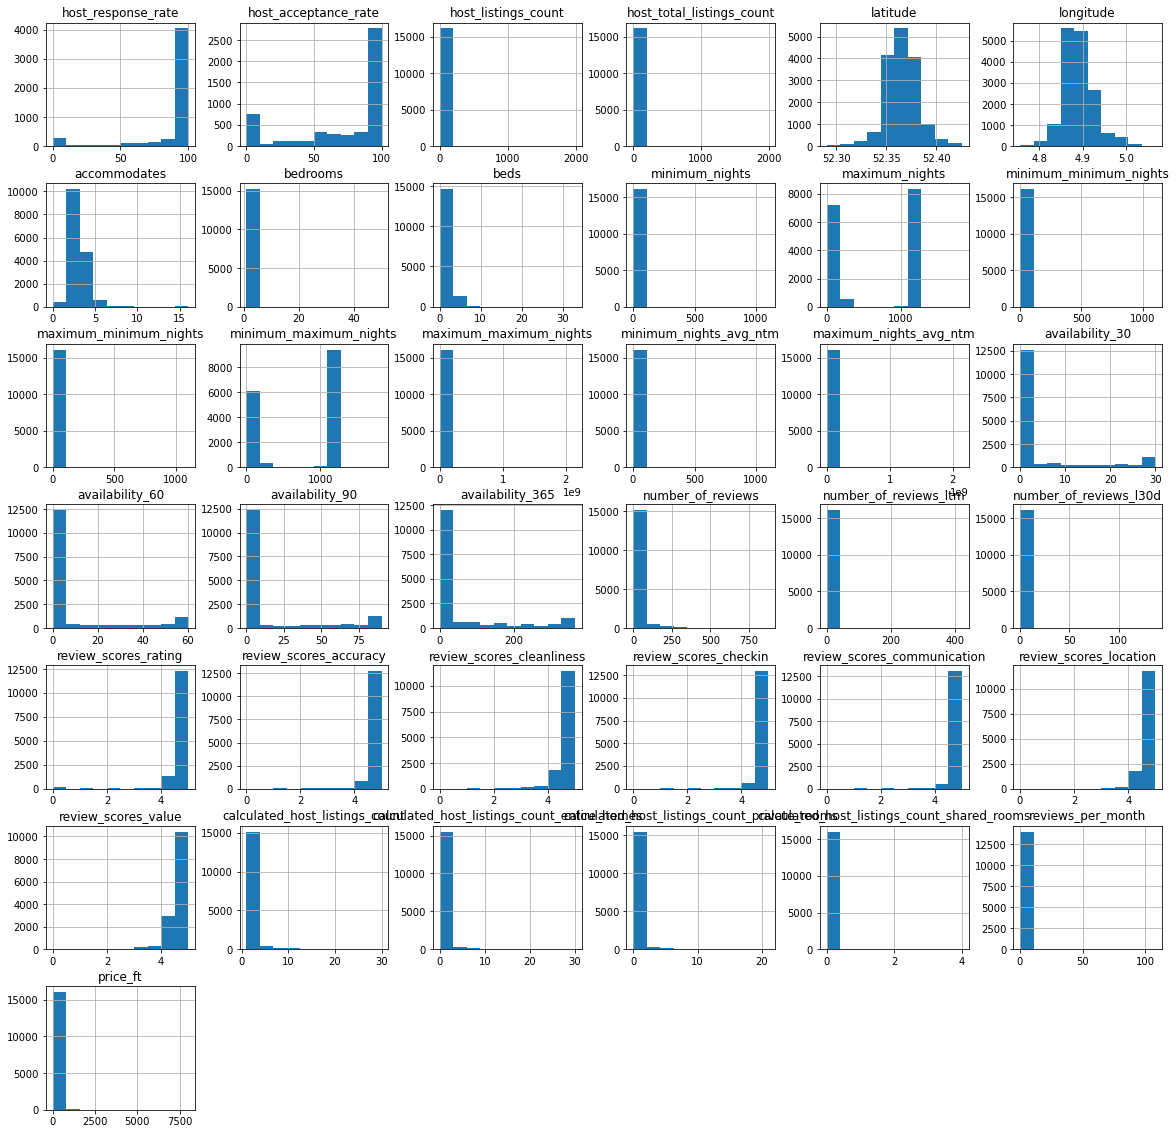

In [13]:
plots = df[num_cols].hist(figsize=(20,20))

#for i, col in enumerate(df.columns):
#    if col in num_cols:
#        plt.figure(i)
#        sns.displot(df[col], kde=False, rug=True, bins=50)

In [14]:
plt.close('all')

Looking at the numerical variables:

- host_listings_count/host_total_listings_count: most of them are <100 which makes sense, since most people would list their own house as airbnb. It does have an outlier of 2000. With so many same values, maybe the column isnt that helpful. The two column are also probably highly correlated.
- accomodates: shows the data is skewed to the left, with most values between 1 and 6, with one outlier in the 16 range.
- bedrooms: shows the data is skewed to the left, with most values less than 10, with one outlier of 50. 
- similar story with beds as bedrooms.
- min_nights: most of the values are in the first bin, with a few above that. Few outliers, especially the >1000 nights. 
- max_nights: the max night has most values above 1000, which seems to be like a default value if the host doesnt type in max nights while listing the place
- similar story as min_nights for min_min_nights, min_max_nights, max_min_nights, max_max_nights and min_nights_avg_ntm. They all seem highly correlated with each other. 
- all the availability columns are highly skewed with most values less than 5
- number of review columns are also skewed and likely to be highly correlated

In [15]:
# removing columns that are in extra. 

extra.remove('id')

df2 = df.copy()
df2 = df2.drop(extra, axis=1) 

In [16]:
df2.head()

,id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_ft
0,2818,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",within an hour,100.0,100.0,t,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room in rental unit,Private room,2,1.5 shared baths,1.0,2.0,"[""Single level home"", ""Coffee maker"", ""Long te...",$59.00,3,28,3.0,3.0,1125.0,1125.0,3.0,1125.0,t,3,28,55,124,2021-09-07,280,2,0,2013-08-25,2019-11-21,4.89,4.93,5.00,4.97,4.97,4.68,4.81,t,1,0,1,0,2.86,59.0
1,20168,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",within an hour,100.0,100.0,f,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.36407,4.89393,Private room in townhouse,Private room,2,1 private bath,1.0,1.0,"[""Hot water"", ""TV"", ""Hangers"", ""Essentials"", ""...",$106.00,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,0,0,0,2021-09-07,339,0,0,2014-01-17,2020-03-27,4.44,4.69,4.79,4.63,4.62,4.87,4.49,t,2,0,2,0,3.64,106.0
2,25428,2009-11-20,"New York, New York, United States",NaN,NaN,0.0,t,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,52.37490,4.88487,Entire rental unit,Entire home/apt,3,1 bath,1.0,1.0,"[""Cable TV"", ""Coffee maker"", ""Long term stays ...",$125.00,14,120,7.0,14.0,120.0,120.0,13.8,120.0,t,1,1,3,57,2021-09-07,5,0,0,2018-01-21,2020-01-02,5.00,5.00,5.00,5.00,5.00,5.00,4.80,f,1,1,0,0,0.11,125.0
3,27886,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",within an hour,86.0,100.0,t,Westelijke Eilanden,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,1.5 baths,1.0,1.0,"[""Coffee maker"", ""Long term stays allowed"", ""P...",$141.00,2,730,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,9,20,47,66,2021-09-07,223,4,2,2013-02-17,2021-08-21,4.95,4.93,4.96,4.95,4.92,4.90,4.80,t,1,0,1,0,2.14,141.0
4,28871,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",within an hour,100.0,98.0,t,Amsterdam Centrum,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,52.36775,4.89092,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Hot water"", ""Shampoo"", ""Dryer"", ""Hangers"", ""...",$75.00,2,1825,2.0,2.0,1825.0,1825.0,2.0,1825.0,t,11,27,50,298,2021-09-08,353,19,8,2015-05-18,2021-08-27,4.87,4.94,4.89,4.97,4.94,4.97,4.82,f,2,0,2,0,4.59,75.0


### Visualizing relationships between variables 

#### Price

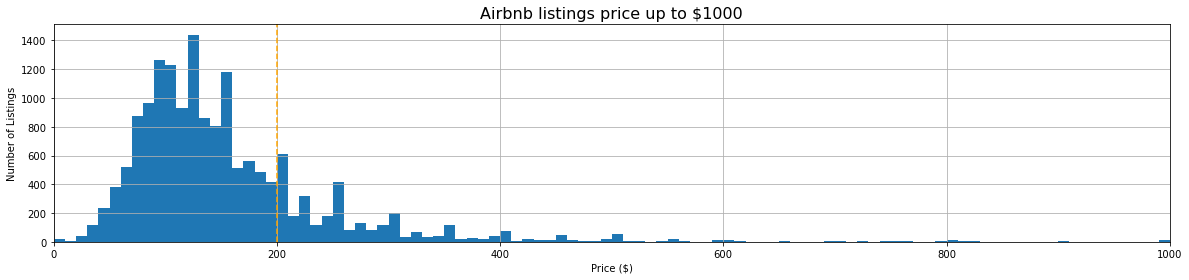

In [17]:
# Checking the distribution of price 
plt.figure(figsize=(20,4))
df2['price_ft'].hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb listings price up to $1000", fontsize=16)
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.show()

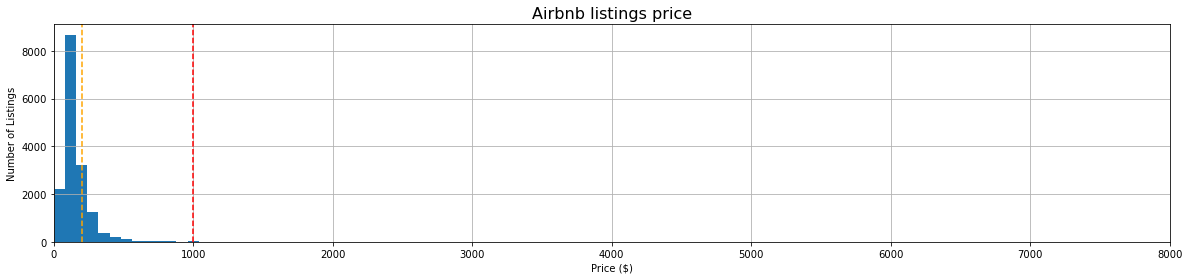

In [18]:
# Checking the distribution of price 
plt.figure(figsize=(20,4))
df2['price_ft'].hist(bins=100, range=(0,max(df2['price_ft'])))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Airbnb listings price", fontsize=16)
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.show()

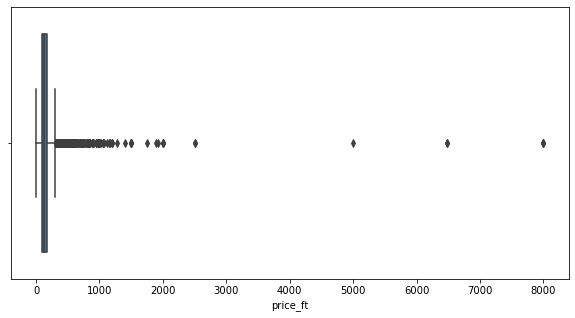

In [19]:
sns.boxplot(x=df2['price_ft'])

In [20]:
df2['price_ft'].describe()

count    16116.000000
mean       156.908476
std        173.418216
min          0.000000
25%         96.000000
50%        130.000000
75%        180.000000
max       8000.000000
Name: price_ft, dtype: float64

The histogram, box plot and the summary statistics suggests there are many large outliers present as well as some that are really small like <$50. Most price values are <200, with the max value being 8000 dollars. 

#### Accommodation

<i> Question: </i> On average, how many are accommodated in airbnb's in Amsterdam and how do their price vary?

<i> Answer: </i> Most listings accommodates 2-4 people, with a few going up to 16. However, there are 12 listings that accommodate zero people, which must be an error. They are also the ones where the price is equal to zero. 

The median price on generally follows the trend of increasing as no of people increases with 3 exceptions: 9,13 and 15. There are only one listing in each of those and can be deleted. 

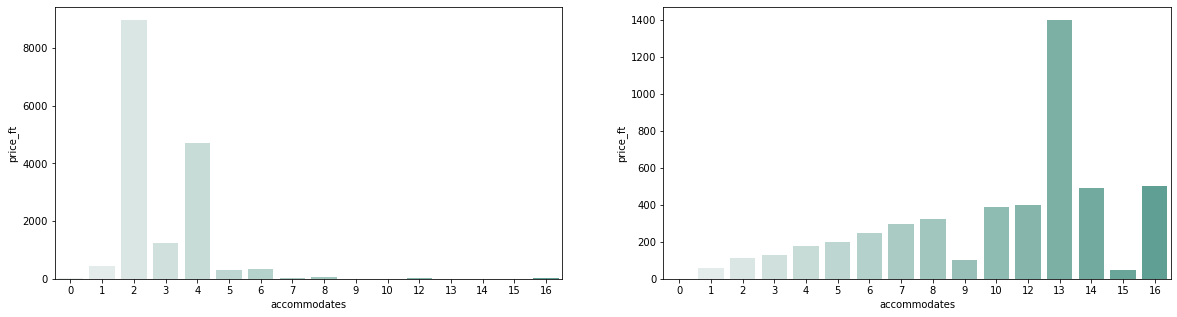

In [21]:
plt.rc('figure', figsize=(20,5))

median_price = df2.groupby(['accommodates'], as_index=False).agg({'price_ft': 'median'})
count_price = df2.groupby(['accommodates'], as_index=False).agg({'price_ft': 'count'})

fig, axs = plt.subplots(nrows=1, ncols=2)

sns.barplot(x='accommodates', y='price_ft' ,data=count_price, ax=axs[0], palette = 'light:#5A9')
sns.barplot(x='accommodates', y='price_ft', data=median_price, ax=axs[1], palette = 'light:#5A9')

In [22]:
accommodates = median_price.merge(count_price, left_on='accommodates', right_on='accommodates')
print(accommodates[accommodates['accommodates'].isin([9,13,15])])

print(accommodates[accommodates['accommodates']==0])

    accommodates  price_ft_x  price_ft_y
9              9        99.0           1
12            13      1400.0           1
14            15        46.0           1
   accommodates  price_ft_x  price_ft_y
0             0         0.0          12


In [23]:
# Deleting rows as mentioned above 
print(df2.shape)

df2 = df2[df2['accommodates']>0]
df2 = df2[~df2['accommodates'].isin([9,13,15])]

print(df2.shape)

(16116, 58)
(16101, 58)


#### host listings count/host total listings count 

In [24]:
# Firstly the variables seem highly correlated and want to check that first

vars = ['host_listings_count', 'host_total_listings_count']
df2[vars].corr()

,host_listings_count,host_total_listings_count
host_listings_count,1.0,1.0
host_total_listings_count,1.0,1.0


There is a 100% relationship between the two. We can delete one and focus on the other. 
For this analysis, I will drop host_total_listings_counts

In [25]:
df2 = df2.drop(columns='host_total_listings_count')

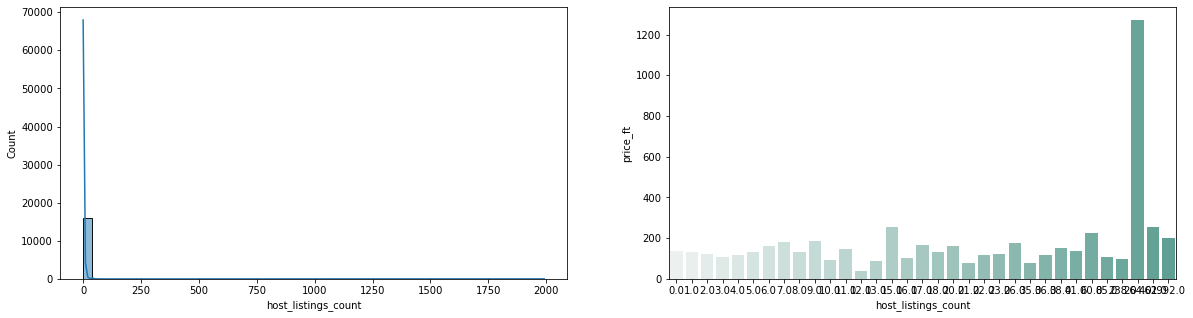

In [26]:
plt.rc('figure', figsize=(20,5))

fig, axs = plt.subplots(nrows=1, ncols=2)

listings = df2.groupby(['host_listings_count'],as_index=False).agg({'price_ft':'median'})

sns.histplot(x='host_listings_count', data=df2, bins=50, kde=True, ax=axs[0])
sns.barplot(x='host_listings_count', y='price_ft', data=listings, ax=axs[1], palette = 'light:#5A9')

Visually, there isnt any coorelation between listings count and price

#### Minimum and Maximum Nights

In [27]:
# Firstly there are many minimum and maximum night variables. 
# Checking to see how coorelated they are 

vars = ['minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights'
        ,'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']

df2[vars].corr()

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
minimum_nights,1.000000,0.002453,0.999589,0.997166,0.002218,-0.001589,0.999416,-0.001589
maximum_nights,0.002453,1.000000,0.002539,0.003696,0.827671,0.010666,0.002851,0.010666
minimum_minimum_nights,0.999589,0.002539,1.000000,0.997126,0.001821,-0.001569,0.999486,-0.001569
maximum_minimum_nights,0.997166,0.003696,0.997126,1.000000,0.002483,-0.000610,0.998740,-0.000610
minimum_maximum_nights,0.002218,0.827671,0.001821,0.002483,1.000000,0.009226,0.002387,0.009226
maximum_maximum_nights,-0.001589,0.010666,-0.001569,-0.000610,0.009226,1.000000,-0.001607,1.000000
minimum_nights_avg_ntm,0.999416,0.002851,0.999486,0.998740,0.002387,-0.001607,1.000000,-0.001607
maximum_nights_avg_ntm,-0.001589,0.010666,-0.001569,-0.000610,0.009226,1.000000,-0.001607,1.000000


There is strong coorelation between multiple variables. There are some differences amongst the columns, which is why I would go with minimum_nights and maximum_nights. Presumably, the minimum_minimum_night is referring to the fact that minimum nights can vary along the year. 

In [28]:
df2 = df2.drop(columns=['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights'
        ,'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm'])

#### Availibility 

According to Amsterdam's rules for listing your property as an Airbnb, you cannot have guests stay in your property for more than 30 days in a calendar year. Hence, we will retain availability_30

In [32]:
df2 = df2.drop(columns=['availability_60', 'availability_90', 'availability_365'])

#### First and Last Reviews

About 2000 listings havent had a review written for them. Since that is a significant number of rows, we cant just delete them, as reviews are an important information. Since these missing values arent truly NAN's, they are probably listings that are new and havent had an reviews, we can convert them to categorical.

In [35]:
df2['first_review'] = pd.to_datetime(df2['first_review'])
df2['calendar_last_scraped'] = pd.to_datetime(df2['calendar_last_scraped'])
# calculating the number of days between the first review and the date the data was scraped
df2['time_since_first_review'] = (df2['calendar_last_scraped'] - df2['first_review']).astype('timedelta64[D]')

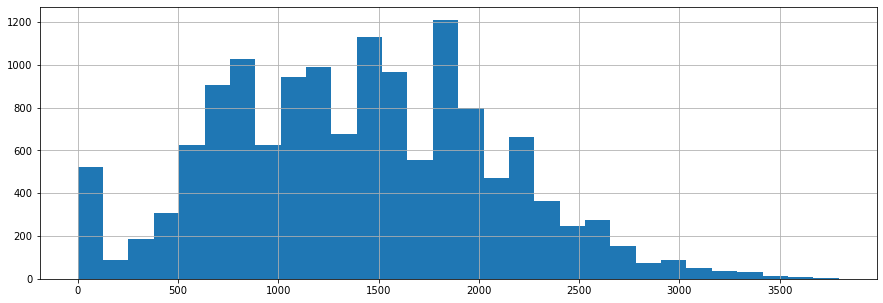

In [37]:
# Distribution of the number of days since first review
df2.time_since_first_review.hist(figsize=(15,5), bins=30);

In [40]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df2[col] = pd.cut(df2[col], bins=bins, labels=labels, include_lowest=True)
    df2[col] = df2[col].astype('str')
    df2[col].fillna(na_label, inplace=True)

In [41]:
# Binning time since first review 
bin_column('time_since_first_review',
          bins=[0,182,365,730,1460,max(df2.time_since_first_review)],
          labels=['0-6 months',
                  '6-12 months',
                  '1-2 years',
                  ' 2-3 years',
                  '4+ years'],
          na_label='no reviews')

Same process for last_review

In [42]:
df2.last_review = pd.to_datetime(df2.last_review)

df2['time_since_last_review'] = (df2['calendar_last_scraped'] - df2['last_review']).astype('timedelta64[D]')

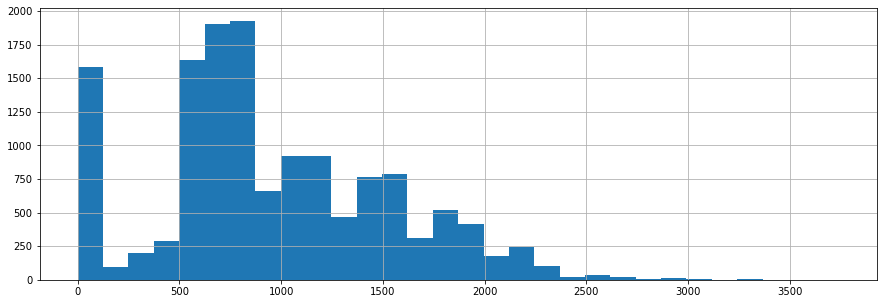

In [44]:
# Distribution of the number of days since last review
df2.time_since_last_review.hist(figsize=(15,5), bins=30);

In [46]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df2.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [47]:
df2.drop('last_review', axis=1, inplace=True)

<i> Question: </i> How long have listings been on site, and how many listings have been reviewed recently

<i> Answer: </i> According to the data, most listings have been on the site for quite some time. The highest category is the "4+ year" for the time since first review, which means over 6000 listings have been on site for at least 4 years. 

However, a significant number of listings have had their last reivew over a year ago. This is probably due to the fact that COVID had stopped international travel, and most of the airbnb's went empty during this period of time. 

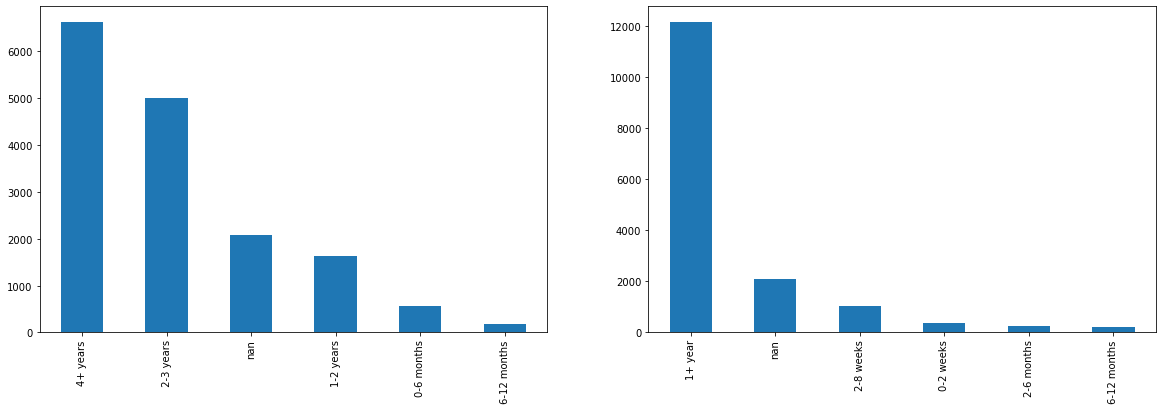

In [49]:
plt.rc('figure', figsize=(20,6))

fig, axs = plt.subplots(nrows=1, ncols=2)

df2['time_since_first_review'].value_counts().plot(kind='bar', ax=axs[0])
df2['time_since_last_review'].value_counts().plot(kind='bar', ax=axs[1])
   

Checking to see if there are any relationships between categorical variables and price

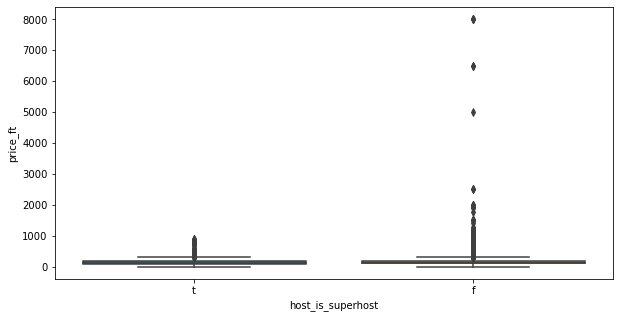

In [24]:
# Host is super host vs price 

sns.boxplot(x='host_is_superhost', y='price_ft', data=df2)

In [25]:
neighbourhood_mean = df2.groupby(['neighbourhood_cleansed'], as_index=False).agg({'price_ft': 'mean'})
neighbourhood_median = df2.groupby(['neighbourhood_cleansed'], as_index=False).agg({'price_ft': 'median'})

neighbourhood = neighbourhood_mean.merge(neighbourhood_median, left_on='neighbourhood_cleansed'
                                                   , right_on='neighbourhood_cleansed')


neighbourhood = neighbourhood.rename(columns = {'price_ft_x': 'mean_price', 'price_ft_y':'median_price'})

neighbourhood = neighbourhood.melt(id_vars=['neighbourhood_cleansed'])
neighbourhood.head()

,neighbourhood_cleansed,variable,value
0,Bijlmer-Centrum,mean_price,99.164835
1,Bijlmer-Oost,mean_price,100.000000
2,Bos en Lommer,mean_price,124.313641
3,Buitenveldert - Zuidas,mean_price,147.105991
4,Centrum-Oost,mean_price,195.972303


[Text(0, 0, 'Bijlmer-Centrum'), Text(0, 0, 'Bijlmer-Oost'), Text(0, 0, 'Bos en Lommer'), Text(0, 0, 'Buitenveldert - Zuidas'), Text(0, 0, 'Centrum-Oost'), Text(0, 0, 'Centrum-West'), Text(0, 0, 'De Aker - Nieuw Sloten'), Text(0, 0, 'De Baarsjes - Oud-West'), Text(0, 0, 'De Pijp - Rivierenbuurt'), Text(0, 0, 'Gaasperdam - Driemond'), Text(0, 0, 'Geuzenveld - Slotermeer'), Text(0, 0, 'IJburg - Zeeburgereiland'), Text(0, 0, 'Noord-Oost'), Text(0, 0, 'Noord-West'), Text(0, 0, 'Oostelijk Havengebied - Indische Buurt'), Text(0, 0, 'Osdorp'), Text(0, 0, 'Oud-Noord'), Text(0, 0, 'Oud-Oost'), Text(0, 0, 'Slotervaart'), Text(0, 0, 'Watergraafsmeer'), Text(0, 0, 'Westerpark'), Text(0, 0, 'Zuid')]

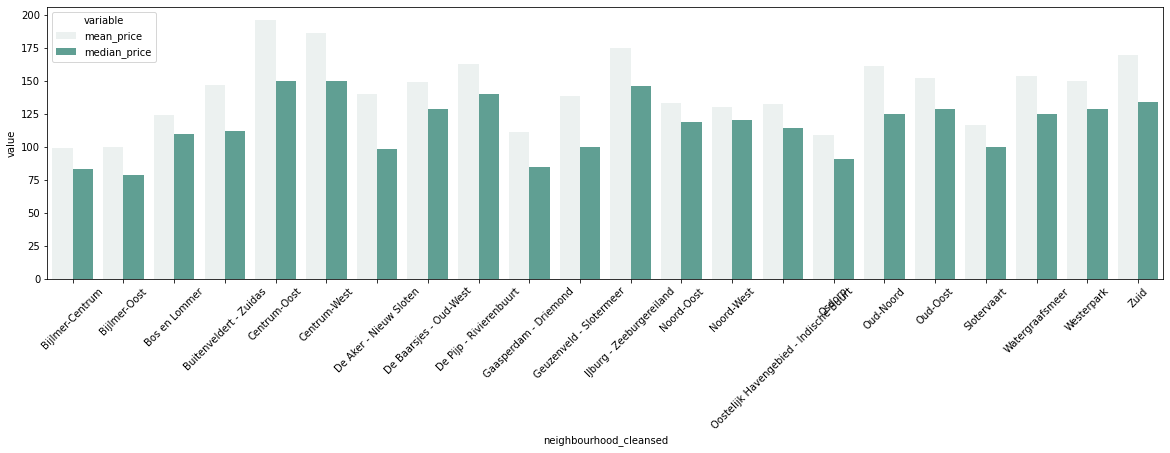

In [26]:
plt.rc('figure', figsize=(20,5))

fig, axs = plt.subplots(1,1)

chart = sns.barplot(x='neighbourhood_cleansed', y='value', data=neighbourhood, hue='variable', palette="light:#5A9")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

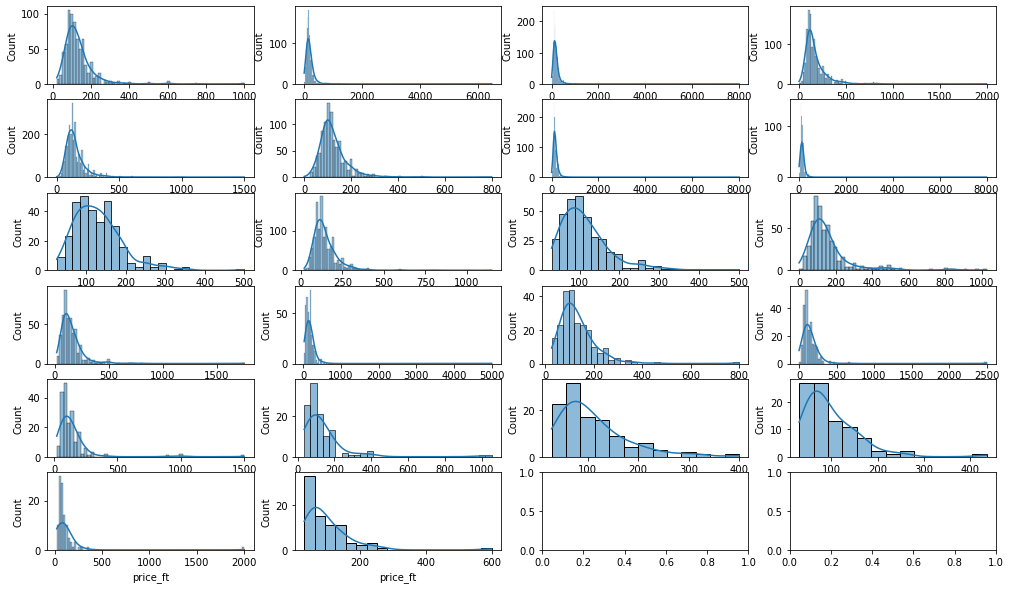

In [27]:
locations = df2['neighbourhood_cleansed'].drop_duplicates().to_list()

fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(17,10))

for i in range(len(locations)):
    
    ax = axs[int(i / 4), i % 4]
    data = df2[df2['neighbourhood_cleansed'] == locations[i]]
    sns.histplot(x='price_ft', data=data, ax=ax, kde=True, legend=True)

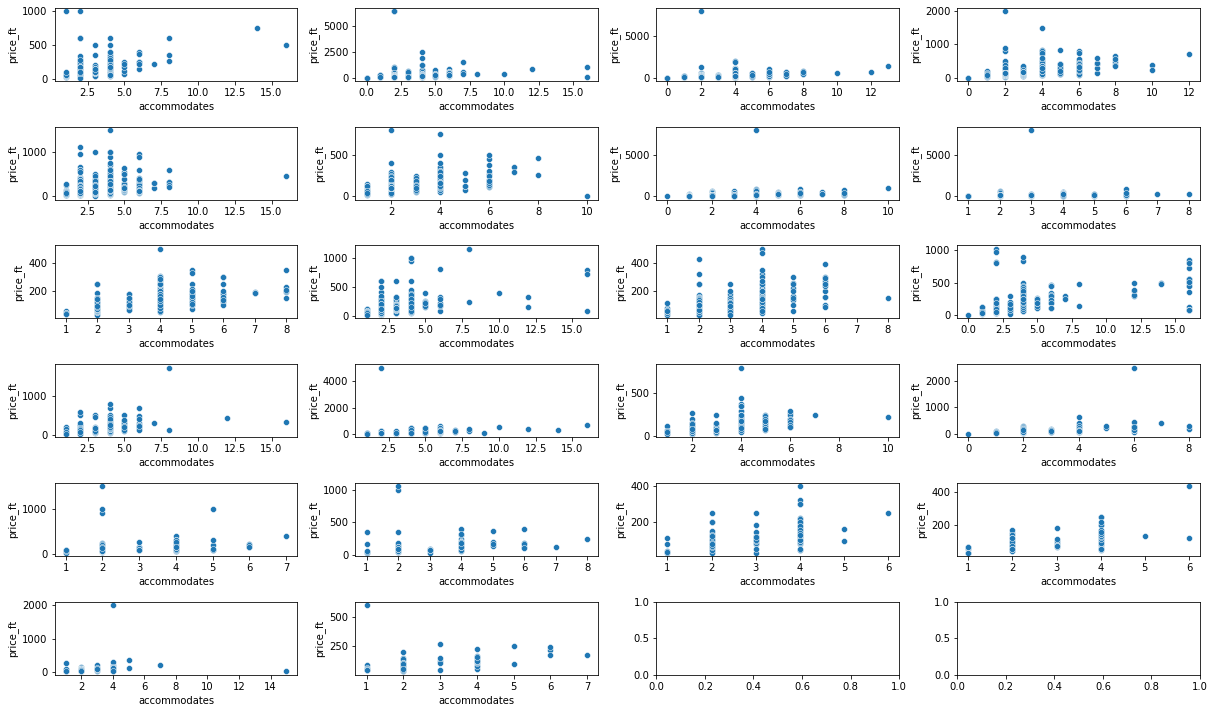

In [28]:
locations = df2['neighbourhood_cleansed'].drop_duplicates().to_list()

fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(17,10))

for i in range(len(locations)):
    
    ax = axs[int(i / 4), i % 4]
    data = df2[df2['neighbourhood_cleansed'] == locations[i]]
    sns.scatterplot(x='accommodates', y='price_ft', data=data, ax=ax)
fig.tight_layout();

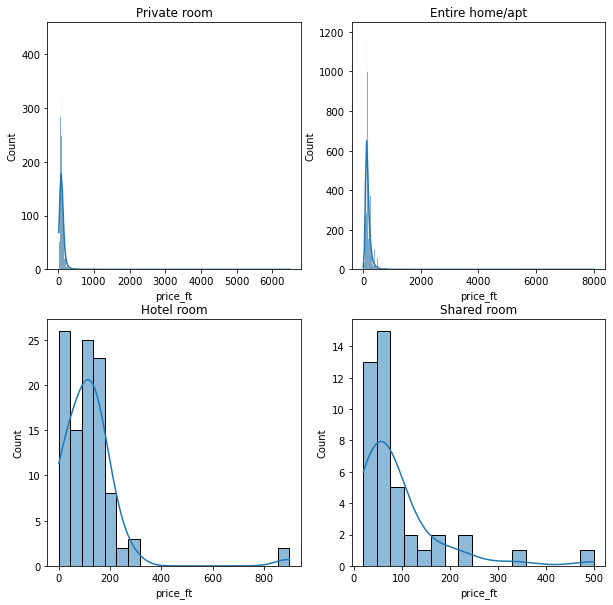

In [29]:
# romm type v price 

room_type = df2['room_type'].drop_duplicates().to_list()

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

for i in range(len(room_type)):
    
    ax = axs[int(i / 2), i % 2]
    data = df2[df2['room_type'] == room_type[i]]
    sns.histplot(x='price_ft', data=data, ax=ax, kde=True, legend=True)
    ax.set_title(room_type[i])

In [30]:
# Price distribution by Room Type

functions = ['mean', 'median', 'min', 'max']

room_type = pd.DataFrame(columns=['room_type', 'mean', 'median', 'min', 'max', 'count'])

types = df2['room_type'].drop_duplicates().to_list()

for i in types:
    mean = df2[df2['room_type']==i]['price_ft'].mean()
    median = df2[df2['room_type']==i]['price_ft'].quantile(0.5)
    minm = df2[df2['room_type']==i]['price_ft'].min()
    maxm = df2[df2['room_type']==i]['price_ft'].max()
    count = df2[df2['room_type']==i]['price_ft'].count()
    
    room_type = room_type.append({'room_type': i, 'mean': mean, 'median': median, 'min': minm, 'max': maxm, 'count': count}
                                 , ignore_index=True)

room_type

,room_type,mean,median,min,max,count
0,Private room,108.030285,85.0,17.0,6477.0,3434
1,Entire home/apt,170.819799,144.0,4.0,8000.0,12536
2,Hotel room,120.067308,111.0,0.0,900.0,104
3,Shared room,92.309524,63.0,20.0,500.0,42


In [31]:
# Checking to see if amenities are correlated with price 

# Pre processing the strings first 
import re
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

def pattern_matching(string, pattern):
    return pattern in string

amenities_list = df2['amenities'].drop_duplicates().to_list()
amenities_list = [str_list.upper() for str_list in amenities_list]

amenities_dict = {}

for str_list in amenities_list:
    words = str_list.split(", ")
    for i in words:
        format_words = re.sub('["[\]]','', i)
        if format_words in amenities_dict:
            amenities_dict[format_words] += 1
        else:
            amenities_dict[format_words] = 1
        
print(take(5, amenities_dict.items()))

amenities_df = pd.DataFrame(columns=['Amenities_Frequency', 'Average_Price', 'Median_Price'])

amenities = [*amenities_dict]

amenities_df['amenities'] = amenities
amenities_df.set_index('amenities', inplace=True)
amenities_df['Amenities_Frequency'] = amenities_dict.values()

mean_value = []
median_value = []

for i in amenities: 
    mean = df2[df2['amenities'].apply(lambda x: pattern_matching(x.upper(), i))]['price_ft'].mean()
    median = df2[df2['amenities'].apply(lambda x: pattern_matching(x.upper(), i))]['price_ft'].quantile(0.5)
    mean_value.append(mean)
    median_value.append(median)

amenities_df['Average_Price'] = mean_value
amenities_df['Median_Price'] = median_value

amenities_df.head()

[('SINGLE LEVEL HOME', 1348), ('COFFEE MAKER', 6728), ('LONG TERM STAYS ALLOWED', 10308), ('LOCK ON BEDROOM DOOR', 1455), ('BACKYARD', 1788)]


,Amenities_Frequency,Average_Price,Median_Price
amenities,,,
SINGLE LEVEL HOME,1348,149.444772,135.0
COFFEE MAKER,6728,166.916899,143.0
LONG TERM STAYS ALLOWED,10308,157.563992,130.0
LOCK ON BEDROOM DOOR,1455,109.798843,90.5
BACKYARD,1788,179.111979,150.0


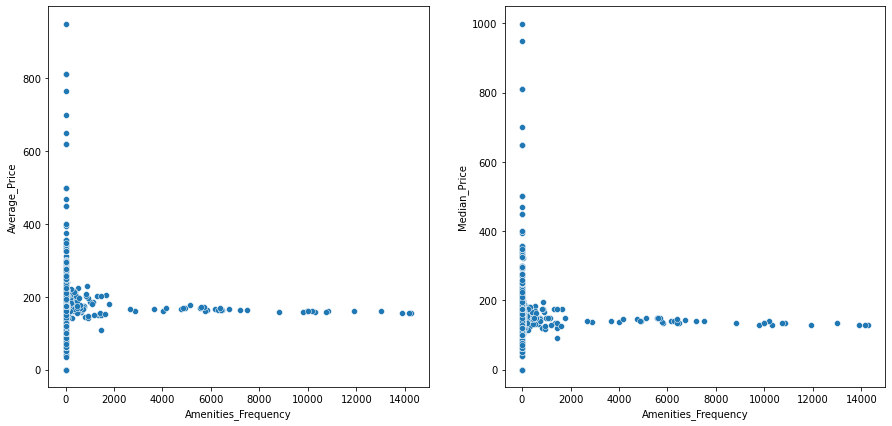

In [32]:
plt.rc('figure', figsize=(15,7))
fig, axs = plt.subplots(nrows=1, ncols=2)

sns.scatterplot(x='Amenities_Frequency', y='Average_Price', data=amenities_df, ax=axs[0])
sns.scatterplot(x='Amenities_Frequency', y='Median_Price', data=amenities_df, ax=axs[1])

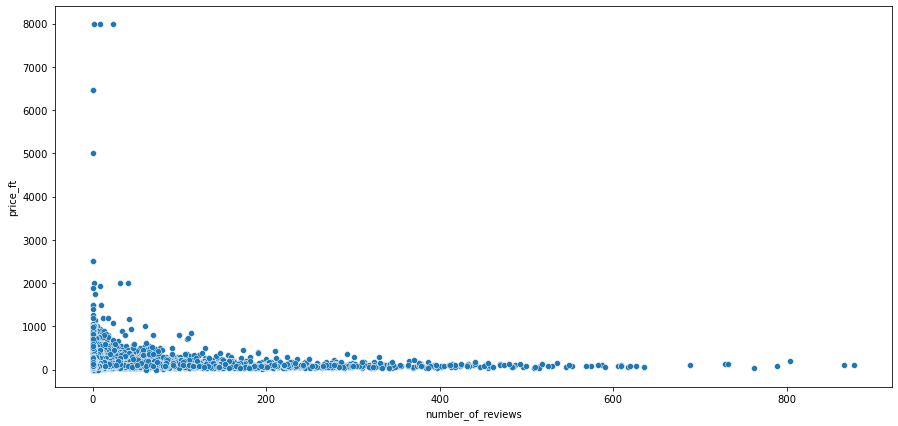

In [33]:
# Number of reviews vs Price 

sns.scatterplot(x='number_of_reviews', y='price_ft', data=df2)

### Cleaning dataset

In [34]:
percentile = list(range(5,100,5))

for i in percentile:
    no_of_rows = df2[df2['price_ft'] <= df2['price_ft'].quantile(i/100)].shape[0] - df2[df2['price_ft'] <= df2['price_ft'].quantile((i-5)/100)].shape[0]
    print("{}th percentile: {} (Number of Rows between percentiles: {})".format(i, df2['price_ft'].quantile(i/100), no_of_rows))

5th percentile: 60.0 (Number of Rows between percentiles: 951)
10th percentile: 73.0 (Number of Rows between percentiles: 674)
15th percentile: 80.0 (Number of Rows between percentiles: 905)
20th percentile: 90.0 (Number of Rows between percentiles: 980)
25th percentile: 96.0 (Number of Rows between percentiles: 508)
30th percentile: 100.0 (Number of Rows between percentiles: 1105)
35th percentile: 109.0 (Number of Rows between percentiles: 509)
40th percentile: 118.0 (Number of Rows between percentiles: 808)
45th percentile: 123.0 (Number of Rows between percentiles: 834)
50th percentile: 130.0 (Number of Rows between percentiles: 1069)
55th percentile: 139.0 (Number of Rows between percentiles: 522)
60th percentile: 149.0 (Number of Rows between percentiles: 808)
65th percentile: 150.0 (Number of Rows between percentiles: 861)
70th percentile: 165.0 (Number of Rows between percentiles: 736)
75th percentile: 180.0 (Number of Rows between percentiles: 922)
80th percentile: 200.0 (Numbe

In [35]:
# There are many large values in price. Checking how many rows are considered an outlier 

IQR = df2['price_ft'].quantile(0.75) - df2['price_ft'].quantile(0.25)
lower_bound = df2['price_ft'].quantile(0.25) - 3*IQR
upper_bound = df2['price_ft'].quantile(0.75) + 3*IQR
lower_bound, upper_bound

(-156.0, 432.0)

In [36]:
# Setting the lower bound to a positive number 
lower_bound = 50
print("Original Shape of dataframe df2 is {}".format(df2.shape))
df3 = df2[(df2['price_ft'] > lower_bound) & (df2['price_ft'] < upper_bound)]

print("New Shape of dataframe is {}".format(df3.shape))

Original Shape of dataframe df2 is (16116, 60)
New Shape of dataframe is (15211, 60)


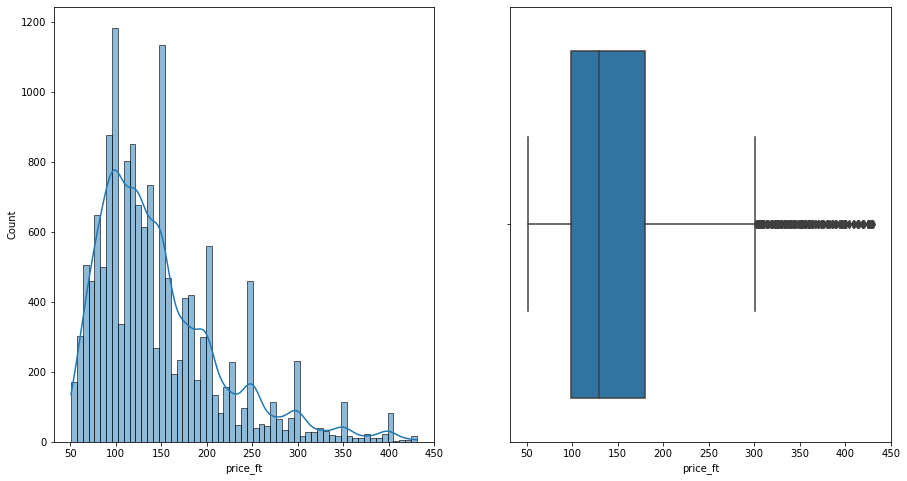

In [37]:
# plotting the new histogram of price 
plt.rc('figure', figsize=(15,8))

fig, axs = plt.subplots(nrows=1, ncols=2)

sns.histplot(x='price_ft', data=df3, kde=True, ax=axs[0])
sns.boxplot(x='price_ft', data=df3, ax=axs[1])

In [38]:
# Looking at columns that have null values 

null_val = round((df3.isnull().sum()/df3.shape[0]*100),2).sort_values(ascending=False)

print(null_val[null_val > 0])

host_response_time             68.97
host_response_rate             68.97
host_acceptance_rate           68.24
host_neighbourhood             35.15
neighbourhood                  34.85
review_scores_checkin          13.70
review_scores_location         13.70
review_scores_value            13.70
review_scores_communication    13.67
review_scores_accuracy         13.65
review_scores_cleanliness      13.64
first_review                   12.39
reviews_per_month              12.39
last_review                    12.39
review_scores_rating           12.39
bedrooms                        5.57
beds                            0.46
host_location                   0.21
bathrooms_text                  0.03
host_listings_count             0.03
host_since                      0.03
host_total_listings_count       0.03
host_is_superhost               0.03
host_has_profile_pic            0.03
host_identity_verified          0.03
dtype: float64


- host response time, response rate and acceptance rate all have ~70% null values. Hence, I am going to drop those columns
- Other columns will be imputed

In [ ]:
df3 = df3.drop(columns={'host_response_rate', 'host_response_time', 'host_acceptance_rate'})

In [ ]:
# For review scores columns, we will use KNN Imputation to fill values in 

# Starting with review_scores_value
from sklearn.impute import KNNImputer 

features = df3.drop(columns={'price_ft', 'review_scores_location', 'review_scores_checkin',
                             'review_scores_communication','review_scores_accuracy', 'review_scores_cleanliness',
                             'reviews_per_month','review_scores_rating'})

X = features.values

for i, k in zip(range(5), (2,5,8,10,15)):
    
    imputed_features = KNNImputer(n_neighbors=k).fit_transform(X)
    
    

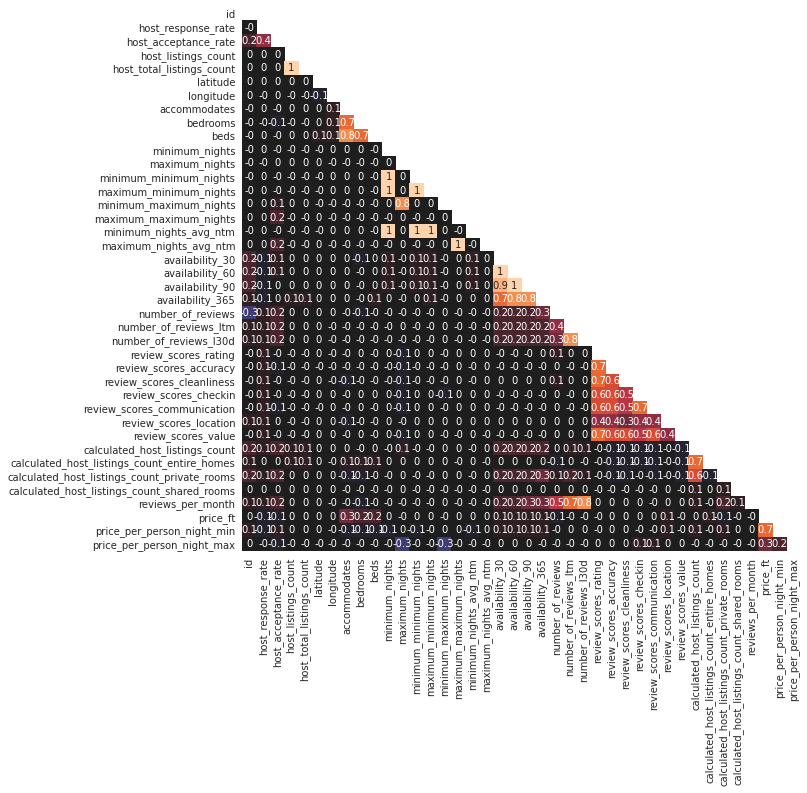

In [21]:
# Checking for relationships between variables 
plt.rc('figure', figsize=(10,10))
corr = df2.corr()
corr = corr.round(1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, 
                xticklabels=corr.columns.values, yticklabels=corr.columns.values,
                center=0, cbar=False, annot=True)